In [46]:
#pip install yellowbrick

In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import scipy
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import preprocessing

Read the merged data in

In [48]:
write_complete_dataframe_path = Path("__file__").parent.joinpath("Manipulated_Data", "Merged_Data").parent.joinpath("Merged_Data", "Merged-Data.csv")
df= pd.read_csv(write_complete_dataframe_path, index_col=0)

Display the data

In [49]:
df.head()

,Date,Carbon Price,Coal Price,Oil Price,Weighted Temp
2,2012-01-03,6.31,109.35,111.12,44.275201
9,2012-01-10,6.83,108.85,113.30,41.734535
16,2012-01-17,6.68,104.30,110.55,35.696682
23,2012-01-24,6.90,106.10,108.38,40.713564
25,2012-01-26,7.46,104.65,109.08,37.962648


Set the data to only include from a certain date

In [50]:
df = df[df["Date"] >= "2018-01-01"]

Look at the correlation between the data

In [51]:
df.corr()

,Carbon Price,Coal Price,Oil Price,Weighted Temp
Carbon Price,1.000000,-0.611753,-0.127731,0.283653
Coal Price,-0.611753,1.000000,0.656771,0.069903
Oil Price,-0.127731,0.656771,1.000000,0.196669
Weighted Temp,0.283653,0.069903,0.196669,1.000000


Make sure p value < 0.05

In [52]:
print(scipy.stats.pearsonr(df["Carbon Price"], df["Oil Price"]))
print(scipy.stats.pearsonr(df["Carbon Price"], df["Coal Price"]))
print(scipy.stats.pearsonr(df["Carbon Price"], df["Weighted Temp"]))

PearsonRResult(statistic=-0.12773055747148568, pvalue=0.00471320777648729)
PearsonRResult(statistic=-0.6117530128320362, pvalue=1.982197726660015e-51)
PearsonRResult(statistic=0.28365256053492244, pvalue=1.7529823332205707e-10)


Set the dependant variable as the carbon price and the independent variables as the coal price, oil price and temperatures.

In [53]:
y = df["Carbon Price"]
X = df[["Coal Price", "Oil Price", "Weighted Temp"]]

Visualise the data

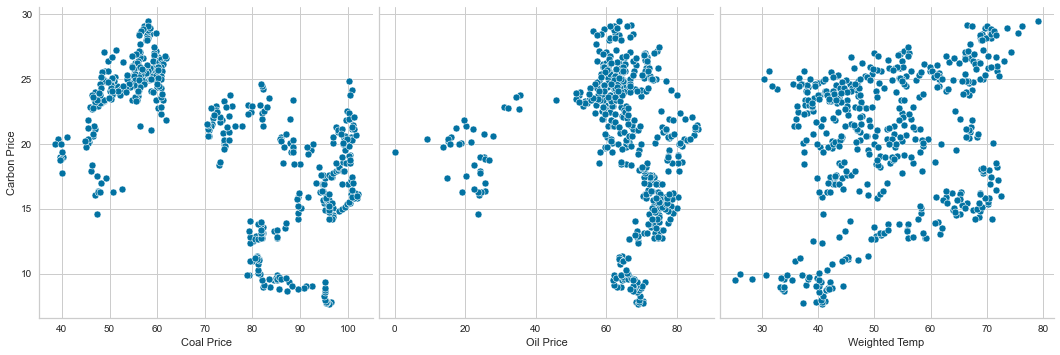

In [54]:
sns.pairplot(df, x_vars = ["Coal Price", "Oil Price", "Weighted Temp"], y_vars = "Carbon Price", height = 5)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [56]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred = linear_regression.predict(X_test)

In [57]:
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))
print("R^2: " ,r2_score(y_test, y_pred))

mean_squared_error :  13.35633439662043
mean_absolute_error :  2.890508091776585
R^2:  0.5666435575885477


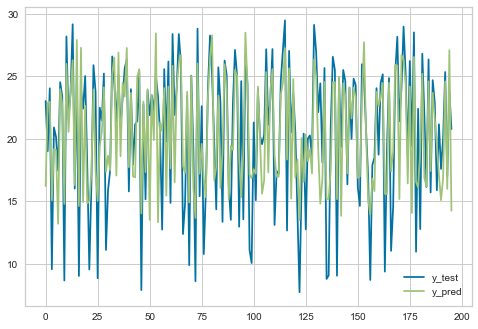

In [58]:
plt.plot(y_test.array, label = 'y_test')
plt.plot(y_pred, label ='y_pred')
plt.legend()
plt.show()

array([16.21030517, 22.86579638, 22.95222946, 15.05280041, 19.16911326,
       19.09172191, 13.19829612, 23.96683819, 22.70589233, 14.78386529,
       25.98536566, 20.54730676, 23.86498718, 26.27627792, 16.28586947,
       27.89869739, 14.61160909, 27.27422494, 14.92803375, 22.62220675,
       14.83422022, 15.00486146, 17.32330506, 23.9434841 , 17.41658692,
       15.0348761 , 19.36265423, 20.55160245, 24.10885619, 17.3394184 ,
       18.63896866, 17.4561563 , 25.20926568, 26.49784344, 17.05253032,
       26.87850238, 18.59516658, 24.48708739, 23.37034744, 27.25947864,
       17.72083797, 23.65715148, 16.98618262, 16.90176998, 24.92595541,
       25.56855494, 14.01764889, 22.9719443 , 17.32274533, 23.96006192,
       13.51158905, 23.47590784, 19.8860987 , 28.42179453, 13.31047733,
       21.30113196, 20.61187747, 24.04303104, 15.43917394, 24.16432185,
       17.62462911, 25.8268649 , 16.51159061, 24.10040471, 26.05962984,
       26.68113185, 17.8106632 , 17.26116609, 23.7473857 , 14.90